# 3. Binomial and Poisson Distributions 

Even though the Poisson distribution is derived from the binomial distribution, it can better describe real experiments with photon counting than can a binomial distribution. The reason? A binomial distribution allows only two outcomes during a given time period: (1) zero photons or (2) one or more photons. The "one or more" is the issue.

There are two goals to this problem. The first goal is to demonstrate numerically that, given low $p$ and high $n$, the two distributions are nearly identical. The second goal is to demonstrate that a binomial distribution is limited.

A well-established count rate of photons from a star (from a given telescope) is 0.035/s. In one experiment, the photons from a star are counted for 100 seconds by a "perfect" CCD that is read out every 1 second (1 second accumulation). In another experiment, the experiment endures for 100 seconds but the CCD is read out every 10 seconds (10 second accumulation).


## Part (a)

Start with the binomial distribution. Write a program that calculates $P(x;n,p)$ as a function of $x$ with $n=100$ and $p=0.035$. Plot your results for $0 \le x \le 15$. Mark the mean, most likely value (mode), and standard deviation.

In [1]:
# libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [37]:
class a_binomial:
    def __init__(self, x_min=0,x_max=15, n=100, p=0.035):
        self.x = np.arange(x_min,x_max+1,1)
        self.n = n
        self.p = p
        self.q = 1-self.p

    # function to calculate probability P(x;n,p)
    def P_binomial(self,x,n,p,q):                             
        numerator = math.factorial(n)                           # fraction numerator: n!
        denominator = math.factorial(n-x)*math.factorial(x)     # fraction denominator: (n-x)!x!
        fraction = numerator/denominator
        px = p**x                                               # p^x
        qnx = q**(n-x)                                          # q^(n-x) = (1-p)^(n-x)
        return fraction*px*qnx                                  # [n!/((n-x)!x!)]*(p^x)*(q*(n-x))

    def Expectation(self,fx,Px):
        E = sum(fx*Px)              # E(x) = sum(f(x)*P(x))
        return E
    
    
    def plot_binomial(self,title="Binomial Distribution"):
        self.Px = [self.P_binomial(x= i,n=self.n,p=self.p,q=self.q) for i in self.x]
        plt.plot(self.x,self.Px, label="Binomial",c='black')
        plt.title(title)
        plt.xlabel("x")
        plt.ylabel("P(x)")

    def plot_mark_mean(self,colors= 'green',linestyles='dashdot',label = "Mean: "):
        # calculate mean: mu = E(x)
        self.mu = self.Expectation(fx=self.x,Px=self.Px)   

        # mark mean in plot
        plt.vlines(self.mu,ymax=max(self.Px),ymin=0,
                   linestyles=linestyles,
                   colors=colors,
                   label=label + "$\mu$ = {0:.3f}".format(self.mu))
        plt.legend()

    def plot_mark_mode(self,colors='blue',linestyles='solid',label='Most Likely Value: '):
        # calculate mode: x value where P(x) is highest
        self.mode = self.x[np.argmax(self.Px)]

        # mark mode in plot
        plt.vlines(self.mode,ymax=max(self.Px),ymin=0,
                   linestyles='solid',
                   colors=colors,
                   label=label+ "mode = {0:.3f}".format(self.mode))
        plt.legend()

    def plot_mark_std(self,colors='orange',linestyles='dotted',label="Standard deviation: "):
        # calculate stand. dev: sigma = sqrt(sigma^2); sigma^2 = E(x-mu)^2
        self.sigma = np.sqrt(self.Expectation(fx=(self.x-self.mu)**2,Px=self.Px)) 

        # mark standard deviation (wrt mean) in plot
        plt.vlines(self.mu+self.sigma,ymax=max(self.Px),ymin=0,
                   colors=colors,
                   linestyles=linestyles,
                   label=label + "$\sigma$ = {0:.3f}".format(self.sigma))
        plt.vlines(self.mu-self.sigma,
                   ymax=max(self.Px),
                   ymin=0,colors=colors,
                   linestyles=linestyles)
        plt.legend()

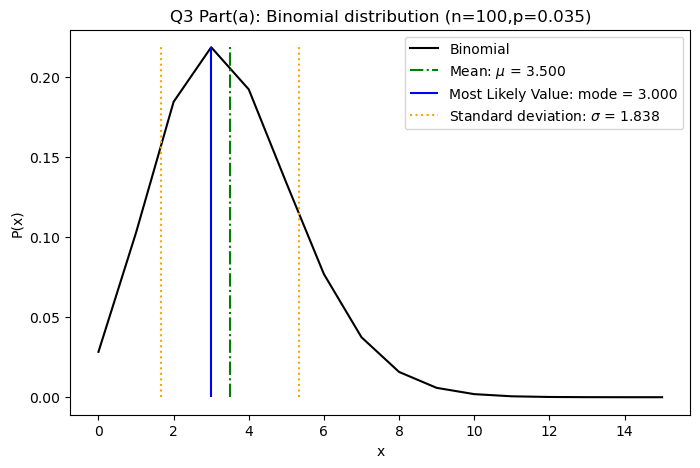

In [38]:
part_a = a_binomial(x_min=0,x_max=15,n=100,p=0.035)
plt.figure(figsize=(8,5))
part_a.plot_binomial(title="Q3 Part(a): Binomial distribution (n={},p={})".format(part_a.n,part_a.p))
part_a.plot_mark_mean()
part_a.plot_mark_mode()
part_a.plot_mark_std()

## Part (b)

Overplot the Poisson distribution for $\lambda = \mu$; use a different color, symbol, or line style to distinguish the two. How close are the two functions? Do they have the same standard deviation?

In [20]:
class b_poisson:
    def __init__(self, x_min=0,x_max=15, lmd=3.5):              
        self.x = np.arange(x_min,x_max+1,1)
        self.lmd = lmd                          # the term "lambda" has its own purpose in python so I named the variable "lmd" instead

    # function to calculate probability P(x;lambda)
    def P_poisson(self,x,lmd):                             
        numerator = lmd**x                          # fraction numerator: lambda^x
        denominator = math.factorial(x)             # fraction denominator: x!
        fraction = numerator/denominator
        e_lmd = math.exp(-lmd)                      # e^(-lambda)
        return fraction*e_lmd                       # [(mu^x)/(x!)]*(e^(-lambda))
    
    # def other(self,x,Px):
    #     mu = sum(x*Px)              # mean: sum(x*P(x))
    #     mode = x[np.argmax(Px)]     # mode: x value where P(x) is highest
    #     sigma = self.n*self.p*self.q
    #     return mu,mode,sigma
    
    def plot(self,title="Poisson Distribution"):
        self.Px = [self.P_poisson(x= i,lmd=self.lmd) for i in self.x]
        # self.mu,self.mode,self.sigma = self.other(x=self.x,Px=self.Px)

        plt.plot(self.x,self.Px, label="Poisson",c='purple')
        # # mean
        # plt.vlines(self.mu,ymax=max(self.Px),ymin=0,
        #            linestyles='dashdot',
        #            colors='green',
        #            label="Mean: $\mu$ = {0:.3f}".format(self.mu))
        # # mode
        # plt.vlines(self.mode,ymax=max(self.Px),ymin=0,
        #            linestyles='solid',
        #            label="Most Likely Value: mode = {0:.3f}".format(self.mode))
        # # standard deviation (wrt mean)
        # plt.vlines(self.mu+self.sigma,ymax=max(self.Px),ymin=0,
        #            colors='orange',linestyles='dotted',
        #            label="Standard deviation: $\sigma$ = {0:.3f}".format(self.sigma))
        # plt.vlines(self.mu-self.sigma,
        #            ymax=max(self.Px),
        #            ymin=0,colors='orange',
        #            linestyles='dotted')
        plt.title(title)
        plt.xlabel("x")
        plt.ylabel("P(x)")
        plt.legend()

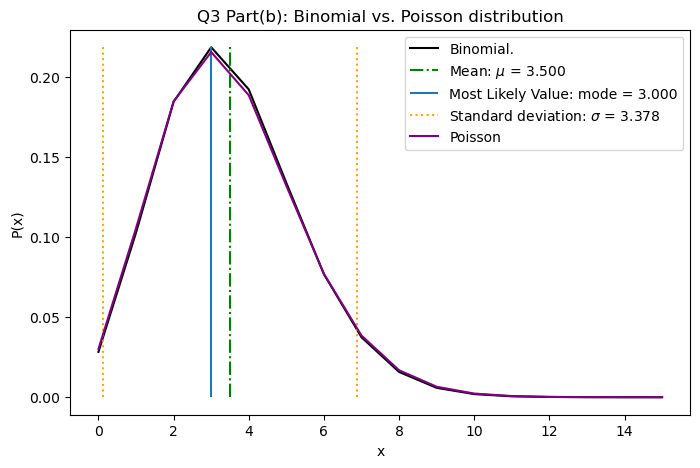

In [17]:
plt.figure(1,figsize=(8,5))
part_a.plot()
part_b.plot(title="Q3 Part(b): Binomial vs. Poisson distribution")

## Part (c)

Repeat **(a)** and **(b)** based on the second experiment (10 second accumulation). Here, I ask you to make a mistake. Assume $p=0.35$ and construct the binomial distribution. Plot your results. What do you conclude?